$$\mbox{Network Design}$$
$$\mbox{Linear Programming, Column Generation, Dantzig-Wolfe Decomposition, Benders Decomposition}$$

We are going to use Julia. There are different options to do that.
- You can install Julia on your computer (you might need an editor such as atom) and execute evrything locally. You can just copy some parts of the code given in the html file.
- In addition to that, you can also install jupyter on your machine and then open the file *.ipynb
- Use google colab, in this case, you need to have a google account (and you d'ont need to install Julia). The file is stored on the Google drive, and programs are executed on a virtual machine.  You have to open the *.ipynb and run the installation cell below. 

In [1]:
# Installation cell
%%capture
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget -q 'https://julialang-s3.julialang.org/bin/linux/x64/1.7/julia-1.7.2-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

After you run the first cell (the cell directly above this text), go to Colab's menu bar and select **Edit** and select **Notebook settings** from the drop down. Select *Julia 1.7* in Runtime type. You can also select your prefered harwdware acceleration (defaults to GPU). 

<br/>You should see something like this:

> ![Colab Img](https://raw.githubusercontent.com/Dsantra92/Julia-on-Colab/master/misc/julia_menu.png)

<br/>Click on SAVE
<br/>**We are ready to get going**





In [4]:
VERSION


v"1.8.5"

# Introduction to Julia

In [5]:
println("This is really the first time I use Julia")

This is really the first time I use Julia


Several packages can be used under Julia. They facilitate modeling and problem solving.
Install JuMP and GLPK (a solver) as follows:

In [6]:
import Pkg

Pkg.add("JuMP")

Pkg.add("GLPK")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


The following program allows to solve the next linar program: 

$$
\begin{array}{ll}
& \min  5x + 3y \\
& 2 x + 3y \geq 100 \\
& 3x + 10y \geq 150 \\
& 0 \leq x \\
& 0 \leq y \leq 3 \\
\end{array}
$$

In [39]:
using JuMP
using GLPK
model = Model(GLPK.Optimizer)
@variable(model, x >= 0)
@variable(model, 0 <= y <= 3)
@objective(model, Min, 5x + 3y)
@constraint(model, c1, 2x + 3y >= 100)
@constraint(model, c2, 3x + 10y >= 150)
print(model)
optimize!(model)
@show termination_status(model)
@show primal_status(model)
@show dual_status(model)
@show objective_value(model)
@show value(x)
@show value(y)
@show(dual.(c1))
@show(dual.(c2))

termination_status(model) = MathOptInterface.OPTIMAL
primal_status(model) = MathOptInterface.FEASIBLE_POINT
dual_status(model) = MathOptInterface.FEASIBLE_POINT
objective_value(model) = 236.5
value(x) = 45.5
value(y) = 3.0
dual.(c1) = 2.5000000000000004
dual.(c2) = 0.0


0.0

Let us build a random graph. Add the following package.

In [8]:
Pkg.add("Graphs")
using Graphs

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


Try the following code to build a random simple directed graph

In [9]:
nG = 8                                        ### number of vertices
global G = SimpleDiGraph(nG)     

for i in 1:nG
        for  j in 1:rand(1:Int(floor(nG/2)))  ### the outdegree of each vertex is randomly chosen here
            bol = false
            while !bol
                v = rand(1:nG)
                if !(v==i)                    #### to avoid loops
                    bol = add_edge!(G,i,v)
                end
            end
        end
end

What is G ?

In [10]:
G

{8, 19} directed simple Int64 graph

Let us draw the graph G. First add these packages.

In [11]:
Pkg.add("GraphPlot")
Pkg.add("Compose")
Pkg.add("Cairo")
using GraphPlot, Compose, Cairo

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


We might store the groph plot in a PDF file as follows:

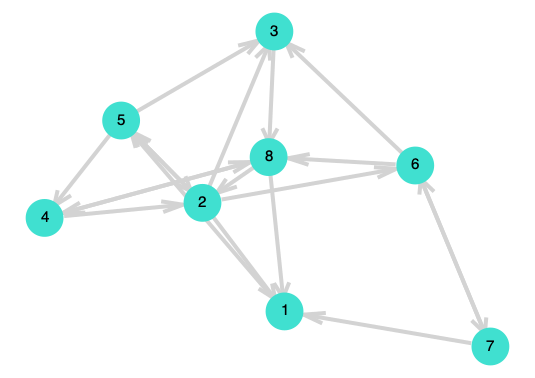

In [13]:
gplot(G,nodelabel=collect(1:nv(G)))

Try also this:

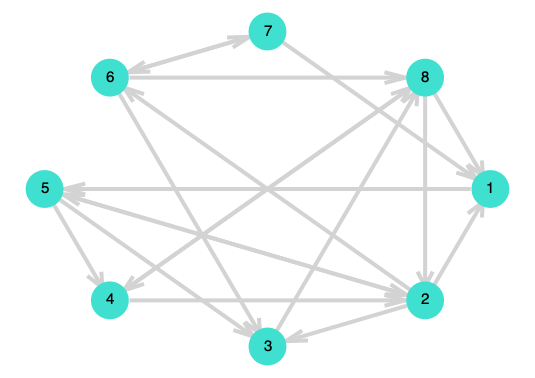

In [14]:
gplot(G,layout=circular_layout,nodelabel=collect(1:nv(G)))

Let us try to know more about the graph $G$. We can get the collection of edges as follows.

In [15]:
collect(edges(G))

19-element Vector{Graphs.SimpleGraphs.SimpleEdge{Int64}}:
 Edge 1 => 5
 Edge 2 => 1
 Edge 2 => 3
 Edge 2 => 5
 Edge 2 => 6
 Edge 3 => 8
 Edge 4 => 2
 Edge 4 => 8
 Edge 5 => 2
 Edge 5 => 3
 Edge 5 => 4
 Edge 6 => 3
 Edge 6 => 7
 Edge 6 => 8
 Edge 7 => 1
 Edge 7 => 6
 Edge 8 => 1
 Edge 8 => 2
 Edge 8 => 4

We obtain below the source and the destination of the third edge.

In [16]:
src(collect(edges(G))[3])

2

In [17]:
dst(collect(edges(G))[3])

3

The set of inneighbors and the set of outneighbors of the vertex 3 are shown here.

In [18]:
inneighbors(G,3)

3-element Vector{Int64}:
 2
 5
 6

In [19]:
outneighbors(G,3)

1-element Vector{Int64}:
 8

In [20]:
ne(G)

19

In [21]:
nv(G)

8

# Maximum concurrent flow problem

We are given a network with known link capacities and some traffic demands (commodities). Demands can be routed through the network in fractional way (using many paths).  We want to compute the maximum fraction (can be larger than 1) of this demands that can be routed without violating capacity constraints. Several equivalent models can be considered for this problem.

##  Formulation based on Kirchhoff's laws

$$
{({Kirchhoff})}: 
\max  \gamma,\\
\sum\limits_{e \in \delta^-(v) } {f}^{ij}_e -  \sum\limits_{e \in \delta^+(v) }f^{ij}_e = 0,   \forall  i \neq j,  v \in V\setminus \{i,j\} \\
\sum\limits_{e \in \delta^+(i)} f^{ij}_e -  \sum\limits_{e \in \delta^-(i) }f^{ij}_e = \gamma d^{ij},   \forall  i \neq j \\
\sum\limits_{e \in \delta^+(j)} f^{ij}_e -  \sum\limits_{e \in \delta^-(j) }f^{ij}_e = - \gamma d^{ij},   \forall  i \neq j    \mbox{  (redundant !!)} \\
\sum\limits_{i \neq j}   f^{ij}_e   \leq b_e,   \forall e \in E \\
f^{ij}_e \geq 0,   \forall e \in E, i \neq j.
$$


Let us implement this model through the following function:

In [25]:
function Concurrent_Kirchhoff(H, dem, capac)

model=Model(GLPK.Optimizer)

@variable(model, gamma)

@variable(model, flow[1:nv(H),1:nv(H),1:ne(H)]>=0)

@constraint(model,kirchoff[s in 1:nv(H),r in 1:nv(H),i in 1:nv(H)],
sum(flow[s,r,e]*(Int(i==src(collect(edges(H))[e])) - Int(i==dst(collect(edges(H))[e]))) for e in 1:ne(H)) == gamma*dem[s,r]*(Int(i==s) - Int(i==r)))

@constraint(model,capacity[e in 1:ne(H)], sum(flow[s,r,e] for s in 1:nv(H),r in 1:nv(H))<=capac[e])

@objective(model, Max,gamma)

#print(model)

optimize!(model)


if (termination_status(model)== MOI.OPTIMAL)
    return objective_value(model)
else
    println("Problem has not an optimal solution")
    return -1
end
end

Concurrent_Kirchhoff (generic function with 1 method)

In [23]:
global Demand = zeros(Float16,nG,nG)     

for i in 1:nG, j in 1:nG
    if !(i==j)                           ##### no demand from i to i
        Demand[i,j] =  rand(1:10)
    end
end


global Capac = zeros(Float16,ne(G))

for e in 1:ne(G)                        ##### observe that ne(G) gives the number of edges og G
    Capac[e]=rand(10:100)
end

In [13]:
Capac

28-element Vector{Float16}:
  70.0
  89.0
  11.0
  68.0
  24.0
  97.0
  88.0
  47.0
  97.0
  50.0
  24.0
  46.0
  68.0
   ⋮
  40.0
  24.0
 100.0
  55.0
  41.0
  62.0
  55.0
  54.0
  69.0
  86.0
  39.0
  34.0

We can now use the function defined above:

In [26]:
Concurrent_Kirchhoff(G,Demand,Capac)

0.39999999999999997

Let us consider larger size networks. Let us for example assume that the number of nodes is 30.

In [58]:
nG = 37
global G = SimpleDiGraph(nG)

for i in 1:nG
        for  j in 1:rand(1:Int(floor(nG/2)))
            bol = false
            while !bol
                v = rand(1:nG)
                if !(v==i)       #### to avoid loops
                    bol = add_edge!(G,i,v)
                end
            end
        end
end

global Demand = zeros(Float32,nG,nG)

for i in 1:nG, j in 1:nG
    if !(i==j)
        Demand[i,j] =  rand(1:10)
    end
end


global Capac = zeros(Float32,ne(G))

for e in 1:ne(G)
    Capac[e]=rand(100:500)
end

Let us solve again the network design problem and measure the computing time:

In [59]:
time_kir = @elapsed  opt_kir = Concurrent_Kirchhoff(G, Demand, Capac)

91.018170041

In [60]:
opt_kir

1.1855670103092784

Problem solving requires more time than previously. We want to reduce it. One way to do that is to aggregate demands.

## Source aggregation to reduce computing time

In the model below demands are aggregated by their source. This model is mathematically equivalent to the non-aggregated one.

$$
{({{Kirchhoff}_{agg}})}: 
\max  \gamma,\\
\sum\limits_{e \in \delta^+(i) } f^{s}_e -  \sum\limits_{e \in \delta^-(i) }f^{s}_e = - \gamma d^{s i},   \forall  s \in V,  i \neq s \\
\sum\limits_{e \in \delta^+(s)} f^{s}_e -  \sum\limits_{e \in \delta^-(s) }f^{s}_e = \sum_{j} \gamma d^{sj},   \forall  s \in V       \mbox{ (redundant) !!}\\
\sum\limits_{s}   f^{s}_e   \leq b_e,   \forall e \in E \\
f^{s}_e \geq 0,   \forall e \in E, s \in V.
$$

A simple modification of the previous code leads to the following implementation of Routing_Kirchhoff_aggregated(H, dem, cost). Compare the cost of the solution and the computing time obtained using the new function with what was obtained using Routing_Kirchhoff(). 

In [45]:
function Concurrent_Kirchhoff_aggregated(H, dem, capac)

model=Model(GLPK.Optimizer)

@variable(model, gamma)

@variable(model, flow[1:nv(H),1:ne(H)]>=0)

@constraint(model,kirchoff[s in 1:nv(H),i in 1:nv(H)],
sum(flow[s,e]*(Int(i==src(collect(edges(H))[e])) - Int(i==dst(collect(edges(H))[e]))) 
for e in 1:ne(H)) == gamma*Int((i==s))*sum(dem[s,j] for j in 1:nv(H)) 
        -gamma*dem[s,i]*Int(!(i==s))) 

@constraint(model,capacity[e in 1:ne(H)], sum(flow[s,e] for s in 1:nv(H))<=capac[e])

@objective(model, Max,gamma)

optimize!(model)

if (termination_status(model)== MOI.OPTIMAL)
    return objective_value(model)
else 
    println("Problem has not an optimal solution")
    return -1
end
end

Concurrent_Kirchhoff_aggregated (generic function with 1 method)

In [61]:
time_kir_agg =  @elapsed  opt_kir_agg = Concurrent_Kirchhoff_aggregated(G, Demand, Capac)

1.643595459

In [62]:
opt_kir_agg

1.1855670103092781

Problem solving requires more time than previously. We want to reduce it. One way to do that is to aggregate demands.

## Path Formulation

For larger size problems, another formulation might be needed. Using a Dantzig-Wolfe decomposition, we get a formulation based on path variables (a path variable represents the flow send throug each path). This leads to the following model.
$$
{({{Path}})}: 
\max  \gamma \\
\sum\limits_{p \in \mathcal{P}^{sr} } f_p    \geq  \gamma d^{s r},   \forall  s, r \in V,  r \neq s \\
\\
\sum\limits_{s, r \in V, s \neq r} \sum\limits_{p \in \mathcal{P}^{sr}:e \in p} f_p   \leq b_e,   \forall e \in E \\
f_p  \geq  0,   \forall  s,r  \in V,  s \neq r, p \in \mathcal{P}^{sr}.
$$

Write the dual problem of this Linear program. Let $\pi$ (resp. $\lambda$) be the dual vector related to demand (resp. capacity) constraints. The constraint related to each path $p \in \mathcal{P}^{sr}$  (in the dual problem) is given by $\pi_{sr} - \sum_{e \in p} \lambda_e \leq 0$. 

To solve the linear program, we will iteratively generate path variable. We start with a subset of paths (say a path for each demand), then we solve the restricted linear program and get the dual variables. We check wether there are  paths violating the constraints  $\pi_{sr} - \sum_{e \in p} \lambda_e \geq 0$. This can be done by computing shortest paths in the sense of $u_e$ weights. If some paths are found, we add them to the restricted linear program and repeat the process until no new paths can be found. Notice that when a path variable is added to the restricted linear program, the contraint related to this path will be automatically satisfied in the next iterations. A path can then never be added more than once. 

We give here a possible implementation of this column generation approach. 
First we will need this intermediate function giving the index of edge ij if the graph contains such an edge.

In [54]:
function Edge_num(H,i,j)

if !(j in outneighbors(H,i))
    println("No edge from ", i, "  to", j)
    return 0

else
found = false
l = 0
    while !found
        l=l+1
        if (src(collect(edges(H))[l])==i)&&(dst(collect(edges(H))[l])==j)
            found = true
            return l
        end
    end
end
end

Edge_num (generic function with 1 method)

In [55]:
function Concurrent_Path(H, dem, capac, printoption)

model=Model(GLPK.Optimizer)

@variable(model, gamma>=0)

@objective(model, Max,gamma)

@constraint(model,capacity[e in 1:ne(H)], 0 <=capac[e])

@constraint(model,demand[s in 1:nv(H), r in 1:nv(H)], gamma*dem[s,r]<=0)

@variable(model,path[1:1]>=0)

Nb_path_generated= zeros(Int,nv(H),nv(H))
lamda = zeros(Float16,ne(H))
obj = Float16

#### Add one path per demand at the beginng: a shortest one
for s in 1:nv(H)
    ds = dijkstra_shortest_paths(H,s)

    for r in 1:nv(H)
        if !(r==s)
            if ds.pathcounts[r]==0
                println("Graph is not strongly connected ")
                return -1
            end
            Nb_path_generated[s,r]=Nb_path_generated[s,r]+1
            push!(path, @variable(model, lower_bound = 0,
                        base_name = "path[$(s)->$(r)_$(Nb_path_generated[s,r])]"))
            set_normalized_coefficient(demand[s,r], path[end], -1)
            p = r
            q = ds.parents[r]
            num = Edge_num(H,q,p)
            set_normalized_coefficient(capacity[num], path[end], 1)
            while !(q==s)
                p= q
                q= ds.parents[p]
                num = Edge_num(H,q,p)
                set_normalized_coefficient(capacity[num],path[end], 1)
            end
        end
    end
end

#### path generation ####
    
stop = false
up = Inf
while !stop
    stop = true
    optimize!(model)
    pi = dual.(demand)
    lamda = dual.(capacity)
    obj=objective_value(model)
    viol = 0.0
    weights=zeros(nv(H),nv(H))


    for e in 1:ne(H)
        weights[src(collect(edges(H))[e]), dst(collect(edges(H))[e])]= abs(lamda[e])
    end


    for s in 1:nv(H)
        ds = dijkstra_shortest_paths(G,s, weights)

        for r in 1:nv(H)
          viol+=(ds.dists[r]*dem[s,r])               

            if (!(r==s))&&(ds.dists[r]<  abs(pi[s,r])-0.0001)          

                Nb_path_generated[s,r]=Nb_path_generated[s,r]+1
                stop = false
                push!(path, @variable(model, lower_bound = 0,
                            base_name = "path[$(s)->$(r)_ $(Nb_path_generated[s,r])]"))
                set_normalized_coefficient(demand[s,r], path[end], -1)
                p = r
                q = ds.parents[r]
                num = Edge_num(H,q,p)
                set_normalized_coefficient(capacity[num], path[end], 1)
                while !(q==s)
                    p= q
                    q= ds.parents[p]
                    num = Edge_num(H,q,p)
                    set_normalized_coefficient(capacity[num],path[end], 1)
                end
            end
        end
    end
if obj/viol<up
    up = obj/viol
end
        if (printoption==1) println("low = ", obj, " up =", up) end
end
#print(model)
return obj, -1*lamda
end

Concurrent_Path (generic function with 1 method)

In [63]:
time_path = @elapsed  opt_path = Concurrent_Path(G, Demand, Capac,1)

low = 0.9565217391304348 up =1.3364485981308418
low = 1.0317460317460316 up =1.3364485981308418
low = 1.090047393364929 up =1.1855670103092781
low = 1.1855670103092784 up =1.1855670103092775


0.706565

In [64]:
opt_path

(1.1855670103092784, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

You can modify the code to print the model (for example at the beginning and at the end).  

Observe that we printed a lower bound and an upper bound after the solution of each restricted master problem. We are using the fact that
$$\bar{\gamma}   \leq \gamma^* \leq \frac{\bar{\gamma}}{\sum_{s=1}^{n} \sum_{r=1}^{n} \pi_{s,r}(\bar{\lambda}) d_{s,r} },$$  where $\bar{\lambda}$ is the current dual vector (capacity constraints),  $\bar{\gamma}$ is optimum obkective value of the current master problem  and $\pi_{s,r}(\bar{\lambda})$ is the length of the shortest path from $s$ to $r$ in sense of the $\bar{\lambda}$  weights (try to prove the validiy of the upper bound). Notice that the upper bound might be infinite.

# Survivable Network Design

We would like to design a network that can survive when link failures occur in the network. We assume that each link in the network can fail. We also assume that we cannot have two simultaneous link failures. 
Once a failure occurs, the traffic can be rerouted. Several rerouting strategies can be considered.

## Global end-to-end rerouting

Let us start with a global end-to-end rerouting strategy where for each link failure all demands can be rerouted (even those that were not interrupted by the failure). A possible model is given below.
$$
{({Global-{rerouting}})}: 
\min  \sum\limits_{e \in E} {cost}_e \times b_e,\\
\sum\limits_{e \in \delta^-(i) } {rer}^{sr}_{e, f} -  \sum\limits_{e \in \delta^+(i) } {rer}^{sr}_{e, f} = 0,   \forall  s \neq r,  i \in V\setminus \{s,r\}, f \in E \\
\sum\limits_{e \in \delta^+(s)} {rer}^{sr}_{e, f} -  \sum\limits_{e \in \delta^-(s) }{rer}^{sr}_{e, f} = d^{sr},   \forall  s \neq r \in V, f \in E \\
\sum\limits_{e \in \delta^+(r)} {rer}^{sr}_{e, f} -  \sum\limits_{e \in \delta^-(r) } {rer}^{sr}_{e, f} = - d^{sr},   \forall  s \neq r \in V, f \in E \mbox{  (redundant !!)} \\
\sum\limits_{s \neq r}   {rer}^{sr}_{e, f}   \leq b_e,   \forall e, f \in E, e \neq f \\
{rer}^{sr}_{e, f} \geq 0,   \forall e, f \in E, e \neq f,  s \neq r.
$$

Notice that since we are requiring that the network is able to route traffic for each link failure, it will be able to route traffic when there are no failures. This is why the previous model does not contain variables related to routing when there are no failures. 

Try the following code. 

In [65]:
function Global_rerouting(H, dem, cost)

model=Model(GLPK.Optimizer)

@variable(model, capa[1:ne(H)]>=0)

@objective(model, Min,sum(capa[e]*cost[e] for e in 1:ne(H)))

@variable(model, reroute[1:ne(H),1:nv(H),1:nv(H),1:ne(H)]>=0)  ### failure is the first argument

@constraint(model,failure_kirchoff[f in 1:ne(H), s in 1:nv(H),r in 1:nv(H),i in 1:nv(H)],
sum(reroute[f,s,r,e]*(Int(i==src(collect(edges(H))[e]))-Int(i==dst(collect(edges(H))[e]))) 
            for e in 1:ne(H)) == dem[s,r]*(Int(i==s) - Int(i==r)))

@constraint(model,forbidden[f in 1:ne(H), s in 1:nv(H),r in 1:nv(H)], reroute[f,s,r,f]==0.0)

@constraint(model,failure_capacity[f in 1:ne(H),e in 1:ne(H)],   Int(!(e==f))*(sum(reroute[f,s,r,e] for s in 1:nv(H),r in 1:nv(H)) -capa[e])<=0)

optimize!(model)
    
if (termination_status(model)== MOI.OPTIMAL)
    return objective_value(model)
else 
    println("Global Rerouting Problem has not an optimal solution")
    return -1
end
end

Global_rerouting (generic function with 1 method)

Let us try with a small graph:

In [66]:
nG = 8
global G = SimpleDiGraph(nG)

for i in 1:nG, j in 1:nG
            if  (j+i)%2==1
                add_edge!(G,i,j)
            end
end

global Demand = zeros(Float16,nG,nG)

for i in 1:nG, j in 1:nG
    if !(i==j)
        Demand[i,j] = i*j
    end
end

global Cost = zeros(Float16,ne(G))

for e in 1:ne(G)
    Cost[e]= 1
end


In [67]:
opt_global = Global_rerouting(G, Demand, Cost)

1893.75

## Partial end-to-end rerouting

To avoid rerouting of demands that were not directly interrupted by a failure, we might consider partial end-to-end rerouting. Notice that the resources that were used by a demand (before failure) that is impacted by a failure are not used again (they are considered as already used). 
A possible model is given below:
$${({Partial-{rerouting}})}: 
\min  \sum\limits_{e \in E} {cost}_e \times b_e,\\
\sum\limits_{e \in \delta^-(v) } {f}^{ij}_e -  \sum\limits_{e \in \delta^+(v) }f^{ij}_e = 0,   \forall  i \neq j,  v \in V\setminus \{i,j\} \\
\sum\limits_{e \in \delta^+(i)} f^{ij}_e -  \sum\limits_{e \in \delta^-(i) }f^{ij}_e = d^{ij},   \forall  i \neq j \\
\sum\limits_{e \in \delta^+(j)} f^{ij}_e -  \sum\limits_{e \in \delta^-(j) }f^{ij}_e = - d^{ij},   \forall  i \neq j    \mbox{  (redundant !!)} \\
\sum\limits_{i \neq j}   f^{ij}_e   \leq b_e,   \forall e \in E \\
f^{ij}_e \geq 0,   \forall e \in E, i \neq j.\\
\sum\limits_{e \in \delta^-(v) } {rer}^{ij}_{e, h} -  \sum\limits_{e \in \delta^+(v) } {rer}^{ij}_{e, h} = 0,   \forall  i \neq j,  v \in V\setminus \{i,j\}, h \in E \\
\sum\limits_{e \in \delta^+(i)} {rer}^{ij}_{e, h} -  \sum\limits_{e \in \delta^-(i) }{rer}^{ij}_{e, h} = f^{ij}_h,   \forall  i \neq j, h \in E \\
\sum\limits_{e \in \delta^+(j)} {rer}^{ij}_{e, h} -  \sum\limits_{e \in \delta^-(j) } {rer}^{ij}_{e, h} = - f^{ij}_h,   \forall  i \neq j,  h \in E    \mbox{  (redundant !!)} \\
\sum\limits_{i \neq j}   {rer}^{ij}_{e, h}  + \sum\limits_{i \neq j}   f^{ij}_e    \leq b_e,   \forall e, h \in E, e \neq h \\
{rer}^{ij}_{e, h} \geq 0,   \forall e, h \in E, e \neq h,  i \neq j.
$$


The function above can be slightly modified to implement a partial rerouting strategy. 

In [68]:
function Partial_rerouting(H, dem, cost)

model=Model(GLPK.Optimizer)

@variable(model, capa[1:ne(H)]>=0)

@objective(model, Min,sum(capa[e]*cost[e] for e in 1:ne(H)))
@variable(model, flow[1:nv(H),1:nv(H),1:ne(H)]>=0)

@variable(model, reroute[1:ne(H),1:nv(H),1:nv(H),1:ne(H)]>=0)  ### failure is the first argument

@constraint(model,kirchoff[s in 1:nv(H),r in 1:nv(H),i in 1:nv(H)],
sum(flow[s,r,e]*(Int(i==src(collect(edges(H))[e])) - Int(i==dst(collect(edges(H))[e]))) 
            for e in 1:ne(H)) == dem[s,r]*(Int(i==s) - Int(i==r)))

@constraint(model,capacity[e in 1:ne(H)],
        sum(flow[s,r,e] for s in 1:nv(H),r in 1:nv(H))<=capa[e])

@constraint(model,failure_kirchoff[f in 1:ne(H), s in 1:nv(H),r in 1:nv(H),i in 1:nv(H)],
sum(reroute[f,s,r,e]*(Int(i==src(collect(edges(H))[e])) - Int(i==dst(collect(edges(H))[e]))) 
            for e in 1:ne(H)) == flow[s,r,f]*(Int(i==s) - Int(i==r)))

@constraint(model,forbidden[f in 1:ne(H), s in 1:nv(H),r in 1:nv(H)], reroute[f,s,r,f]==0.0)

@constraint(model,failure_capacity[f in 1:ne(H),e in 1:ne(H)],   
Int(!(e==f))*(sum(flow[s,r,e] for s in 1:nv(H),r in 1:nv(H))+ 
sum(reroute[f,s,r,e] for s in 1:nv(H),r in 1:nv(H))-capa[e]) <=0)

optimize!(model)

if (termination_status(model)== MOI.OPTIMAL)
    return objective_value(model)
else 
    println("Partial Rerouting Problem has not an optimal solution")
    return -1
end
end

Partial_rerouting (generic function with 1 method)

In [69]:
opt_partial = Partial_rerouting(G, Demand, Cost)

1973.3333333333335

Observe that the cost obtained with partial rerouting is higher than the one obtained using global rerouting.

## Local rerouting

Another strategy that can be used is local Rerouting. Here we assume that if a link ij fails, then all traffic that was going through this link should be rerouted from i to j (the source and destination of demands do not care about the failure since rerouting is managed by the extremities of the failing link).
Propose a function to implement this rerouting strategy. What is the solution's cost ? 

# A two-level decomposition for the global rerouting problem: Benders decompostion and Dantzig-Wolfe decomposition

It is clear that the global rerouting problem becomes difficult to solve when the size of the network increases. We are going to decompose the problem at two layers. Observe that once the capacities are fixed, one has to check that for each linlk failure $f$, the network is able to route all demands. This can be done, for example, by solving a maximum concurrent flow problem (assuming $f$ is under failure). If the optimal $\gamma$ is larger than $1$, we know that capacities are sufficient to handle traffic under this failure. Otherwise, we get an inequality $\sum_{e \neq f} \lambda_e b_e \geq 1$ that is violated (these inequalities are exactly those introduced at the end of the lecture...since $\sum_{s,r} \pi^{s,r} d^{s,r} = 1$). This inequality is then added to a master problem where variables are capacities ($b_e$) and constraints are added in this way. Each concurent flow problem is solved by column generation (Dantzig-Wolfe decompostion).   A possible implementation is given below: 

In [ ]:
function Benders_Global_rerouting(H, dem, cost, print)

      model=Model(GLPK.Optimizer)

    @variable(model, capa[1:ne(H)]>=0)

    @objective(model, Min,sum(capa[e]*cost[e] for e in 1:ne(H)))

     current_capa = zeros(Float16,ne(H))
     capa_under_failure = zeros(Float16,ne(H))

    stop = false
iter = 0
    while !stop
        stop = true
        optimize!(model)
        iter = iter+1
        if (print==1) println("obj = ", objective_value(model), " it =", iter) end

        for e in 1:ne(H)
             current_capa[e] = value(capa[e])
        end
        for e in 1:ne(H)

            for i in 1:ne(H)
                capa_under_failure[i]=current_capa[i]
            end
            capa_under_failure[e]=0.0   ### capacity of link e is 0 under failure of e

            res = Concurrent_Path(H, dem, capa_under_failure,0)
            if res[1]<1-0.0001
                @constraint(model,res[2]'*capa -res[2][e]*capa[e] >=1)              
            stop = false
            end
        end

    end

return objective_value(model)
end

Benders_Global_rerouting (generic function with 1 method)

In [ ]:
Benders_Global_rerouting(G, Demand, Cost,1)

obj = 0.0 it =1
obj = 67.2 it =2
obj = 197.86666666666665 it =3
obj = 309.8666666666666 it =4
obj = 315.2 it =5
obj = 328.53333333333336 it =6
obj = 352.5333333333335 it =7
obj = 695.1666666666672 it =8
obj = 1202.5000000000007 it =9
obj = 1428.5000000000018 it =10
obj = 1564.499999999968 it =11
obj = 1633.500000000001 it =12
obj = 1689.3333333333526 it =13
obj = 1745.833333333336 it =14
obj = 1771.999999999971 it =15
obj = 1804.6666666666656 it =16
obj = 1821.9999999999977 it =17
obj = 1844.0000000000014 it =18
obj = 1843.9999999999995 it =19
obj = 1844.0000000000002 it =20
obj = 1843.9999999999984 it =21
obj = 1843.999999999998 it =22
obj = 1843.9999999999998 it =23
obj = 1844.0 it =24
obj = 1844.0000000000018 it =25
obj = 1843.999999999999 it =26
obj = 1843.999999999999 it =27
obj = 1844.0000000000018 it =28
obj = 1843.999999999999 it =29
obj = 1848.1599999999999 it =30
obj = 1848.16 it =31
obj = 1893.7499999999998 it =32
obj = 1893.7500000000011 it =33
obj = 1893.7500000000007 it =

1893.750000000001

Let us consider a little bit larger size network and try again the Benders approach (notice that the model based on Kirchhoff laws is difficult to solve). 

In [ ]:
nG = 10
global G = SimpleDiGraph(nG)

for i in 1:nG, j in 1:nG
            if  (j+i)%2==1
                add_edge!(G,i,j)
            end
end

global Demand = zeros(Float32,nG,nG)

for i in 1:nG, j in 1:nG
    if !(i==j)
        Demand[i,j] = i*j
    end
end

global Cost = zeros(Float32,ne(G))

for e in 1:ne(G)
    Cost[e]= 1
end

In [ ]:
Benders_Global_rerouting(G, Demand, Cost,1)

obj = 0.0 it =1
obj = 102.85714285714286 it =2
obj = 305.35714285714283 it =3
obj = 485.3571428571428 it =4
obj = 488.69047619047615 it =5
obj = 562.8571428571429 it =6
obj = 577.8571428571429 it =7
obj = 607.8571428571429 it =8
obj = 622.8571428571429 it =9
obj = 645.3571428571428 it =10
obj = 650.3571428571429 it =11
obj = 1432.4999999999998 it =12
obj = 1473.8 it =13
obj = 2245.1818181818257 it =14
obj = 2763.0000000000146 it =15
obj = 3155.020408163265 it =16
obj = 3316.281065088767 it =17
obj = 3405.999999999998 it =18
obj = 3543.822222222219 it =19
obj = 3692.969660194173 it =20
obj = 3810.5789473684113 it =21
obj = 3943.9999999999995 it =22
obj = 3943.999999999999 it =23
obj = 3943.9999999999973 it =24
obj = 3943.999999999997 it =25
obj = 3978.499999999997 it =26
obj = 3989.2500000000005 it =27
obj = 3989.250000000002 it =28
obj = 3989.249999999998 it =29
obj = 4008.9999999999986 it =30
obj = 4009.000000000012 it =31
obj = 4008.9999999999977 it =32
obj = 4009.0000000000023 it =3

LoadError: ignored

We stopped here the program since it seems that the value of the objective function does not change while the program continues adding cuts. This tailing-off phenomenon is very common in column and/or cut generation. 
To avoid (or reduce) this problem, stabilization techniques have been proposed. One of the simplest and most efficient procedures is the In-Out technique of Ben-Ameur&Neto. At each iteration, a current capacity vector $b_{in}$ (satisfying all constraints) is known while $b_{out}$ is the optimum of the current master problem. The cost of $b_{in}$ is higher than the cost of $b_{out}$. Instead of looking for constraints violated by $b_{out}$, we consider a point $b_{sep}$ belonging the the segment $[b_{in},b_{out}]$ and try to find constraints violated by 
$b_{sep}$. If we do not find such inequalities, we deduce that we have a new feasible point having a lower cost (so $b_{sep}$ becomes the new $b_{in}$). If we are able to find violated inequalities, these inequalities will also be violated by $b_{out}$ (for convexity reasons). So we will also eliminate (separate) the current $b_{out}$ (by solving the new master problem we cannot get the same $b_{out}$). Since $b_{sep}$ is somewhat close to the set of feasible capacity vectors, the inequalities obtained by considering $b_{sep}$ are intuitively better than those obtained in classical way.

In [ ]:
function Inout_Benders_Global_rerouting(H, dem, cost)

  model=Model(GLPK.Optimizer)
   
    @variable(model, capa[1:ne(H)]>=0)

    @objective(model, Min,sum(capa[e]*cost[e] for e in 1:ne(H)))

    capa_in = zeros(Float16,ne(H))
    capa_out = zeros(Float16,ne(H))

    current_capa = zeros(Float16,ne(H))
    capa_under_failure = zeros(Float16,ne(H))

    tot = sum(dem[s,r] for s in 1:nv(H), r in 1:nv(H))

    for e in 1:ne(H)
        capa_in[e] = tot
    end
    cost_in = tot*ne(H)
    cost_out = 0.0
    stop = false
    iter = 0
    while ((cost_in - cost_out)/cost_in > 0.0001)
        if (stop ==true)
            for e in 1:ne(H)
                capa_in[e] = current_capa[e]
            end
            cost_in = cost'*capa_in
        end
        stop = true
        optimize!(model)
        iter = iter+1
        println("obj = ", objective_value(model), " cost_in = ", cost_in , " it =", iter)

        cost_out = objective_value(model)
       beta = rand()
        for e in 1:ne(H)
             current_capa[e] = beta*value(capa[e])+(1-beta)*capa_in[e]
        end
        for e in 1:ne(H)

            for i in 1:ne(H)
                capa_under_failure[i]=current_capa[i]
            end
            capa_under_failure[e]=0.0

            res = Concurrent_Path(H, dem, capa_under_failure,0)
            if res[1]<1-0.0001
                @constraint(model,res[2]'*capa -res[2][e]*capa[e] >=1)
                
            stop = false
            end
        end

    end

return cost_in
end



Inout_Benders_Global_rerouting (generic function with 1 method)

In [ ]:
Inout_Benders_Global_rerouting(G, Demand, Cost)

obj = 0.0 cost_in = 132000.0 it =1
obj = 0.0 cost_in = 56900.0 it =2
obj = 0.0 cost_in = 10700.0 it =3
obj = 0.0 cost_in = 7150.0 it =4
obj = 2480.0 cost_in = 7150.0 it =5
obj = 3152.0000000000005 cost_in = 7150.0 it =6
obj = 3442.250000000001 cost_in = 7150.0 it =7
obj = 3442.250000000001 cost_in = 5675.75 it =8
obj = 3697.999999999994 cost_in = 5675.75 it =9
obj = 3697.999999999994 cost_in = 5226.6875 it =10
obj = 3697.999999999994 cost_in = 4527.875 it =11
obj = 3989.9999999999504 cost_in = 4527.875 it =12
obj = 4128.999999999997 cost_in = 4527.875 it =13
obj = 4129.000000000024 cost_in = 4527.875 it =14
obj = 4129.000000000024 cost_in = 4482.0625 it =15
obj = 4135.999999999996 cost_in = 4482.0625 it =16
obj = 4277.863636363641 cost_in = 4482.0625 it =17
obj = 4277.863636363641 cost_in = 4431.0312 it =18
obj = 4277.863636363641 cost_in = 4386.25 it =19
obj = 4277.863636363637 cost_in = 4386.25 it =20
obj = 4277.863636363625 cost_in = 4386.25 it =21
obj = 4280.045454545459 cost_in = 

4305.176f0